In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)

# EDA

In [2]:
dataset=pd.read_csv('sales.csv')


In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 81)

In [6]:
dataset['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
for feature in dataset.columns:
    if dataset[feature].isnull().sum()>0:
        print(feature)
        r=dataset[feature].isnull().sum()
        print(r)
    


LotFrontage
259
Alley
1369
MasVnrType
8
MasVnrArea
8
BsmtQual
37
BsmtCond
37
BsmtExposure
38
BsmtFinType1
37
BsmtFinType2
38
Electrical
1
FireplaceQu
690
GarageType
81
GarageYrBlt
81
GarageFinish
81
GarageQual
81
GarageCond
81
PoolQC
1453
Fence
1179
MiscFeature
1406


In [12]:
features_with_null=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [13]:
for features in features_with_null:
    print(features,np.round(dataset[features].isnull().mean(),4),"%missing values")

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
Electrical 0.0007 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


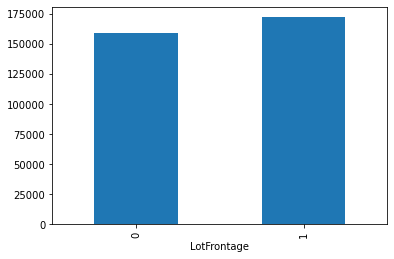

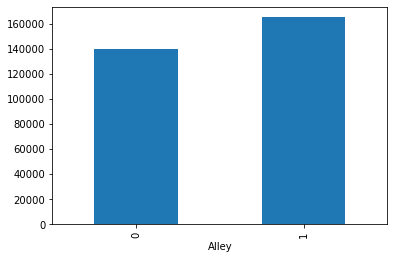

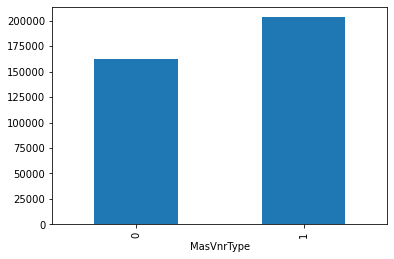

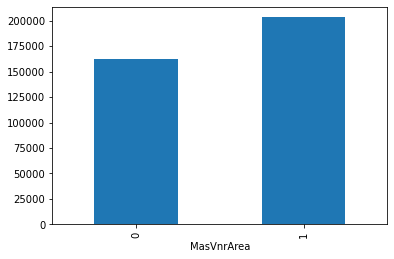

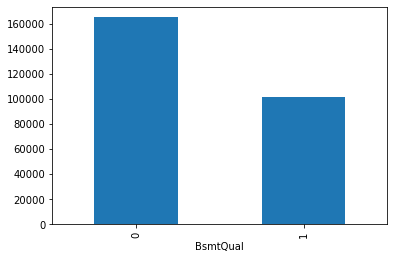

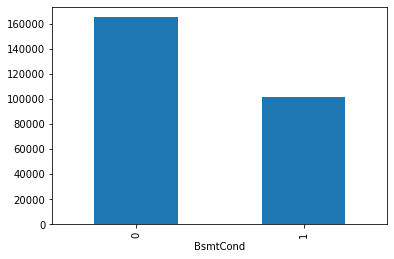

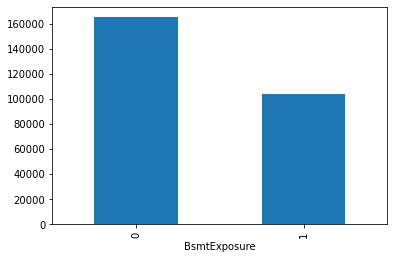

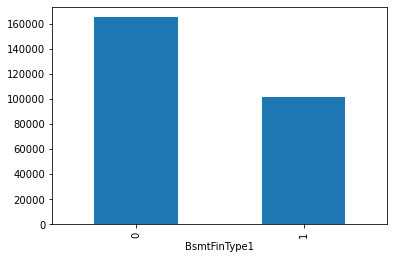

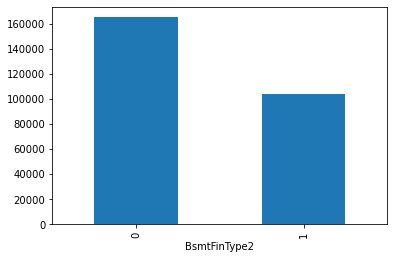

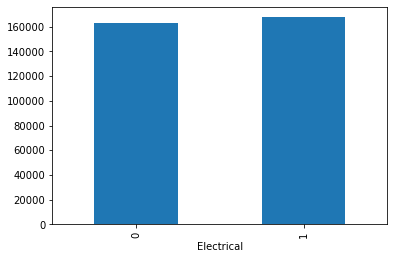

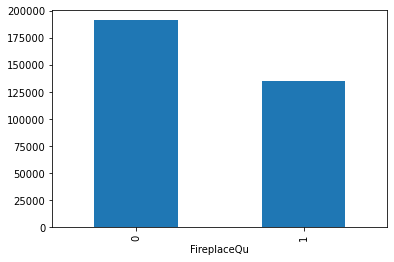

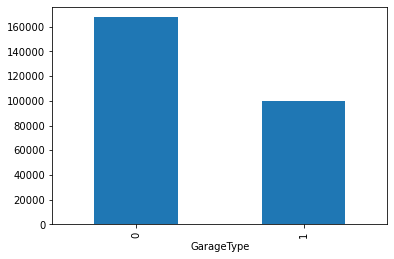

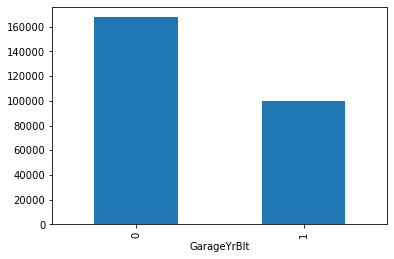

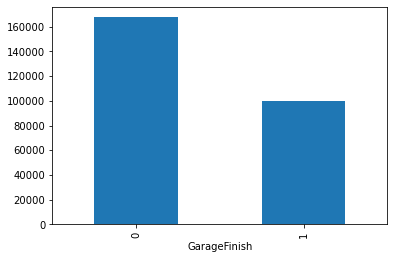

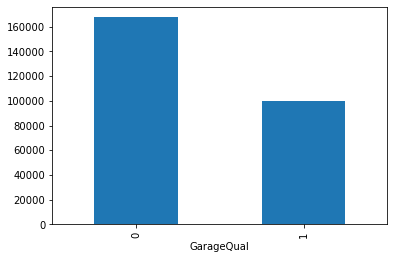

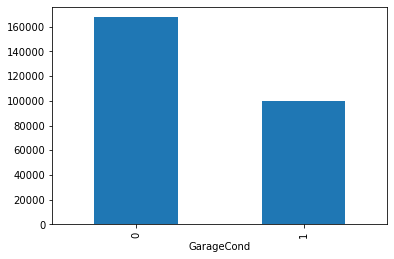

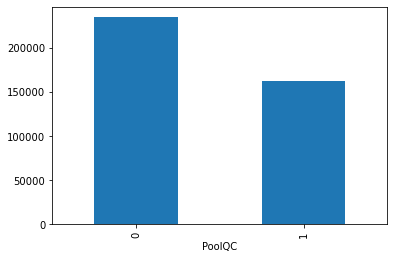

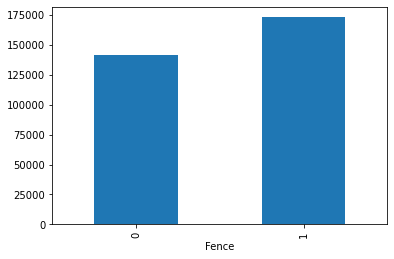

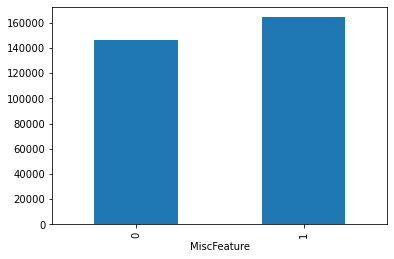

In [14]:
for feature in features_with_null:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [15]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]

In [16]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
dataset[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [18]:
year_feature=[feature for feature in numerical_features if "Yr" in feature or "Year" in feature]

In [19]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [20]:
for feature in year_feature:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House price vs year sold')

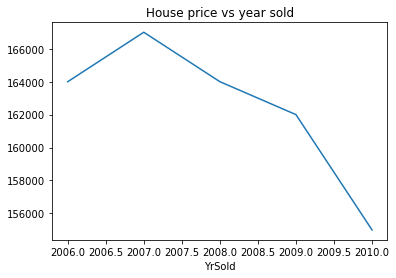

In [21]:
dataset.groupby("YrSold")["SalePrice"].median().plot()
plt.title("House price vs year sold")

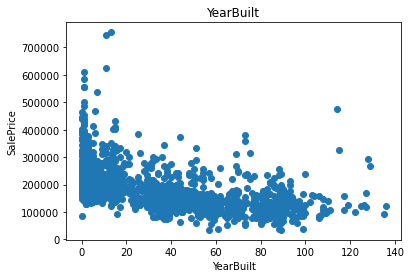

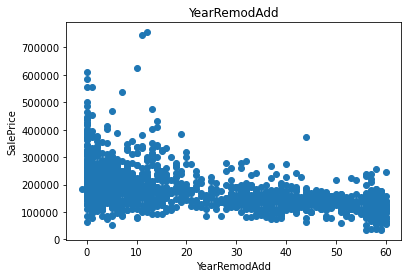

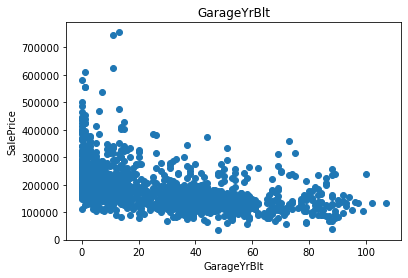

In [22]:
for feature in year_feature:
    if feature!="YrSold":
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

In [23]:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature]

In [24]:
len(discrete_features)

17

In [25]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [26]:
dataset[discrete_features]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


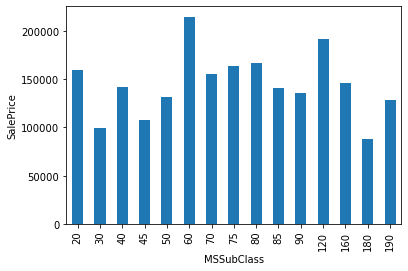

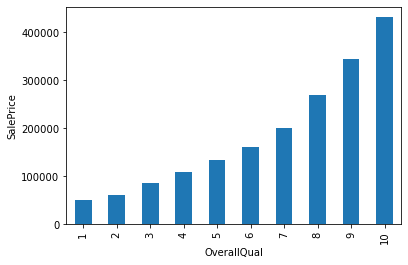

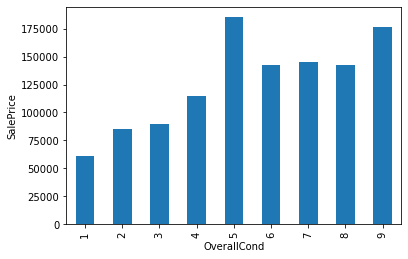

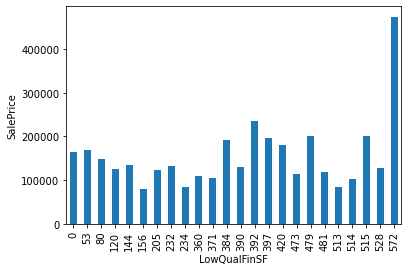

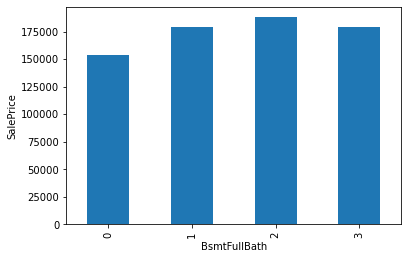

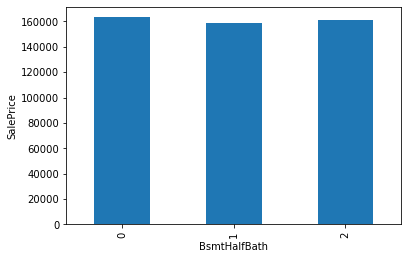

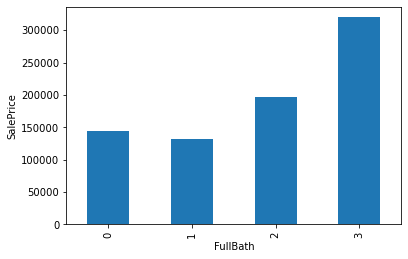

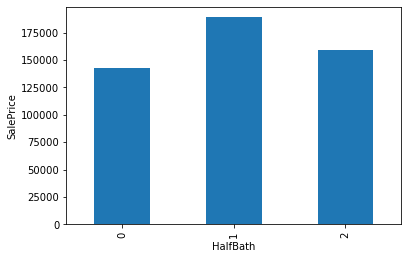

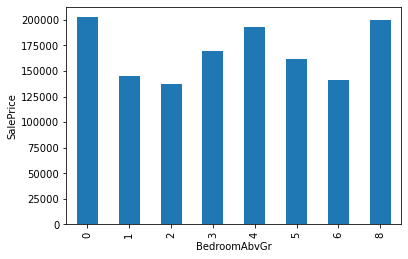

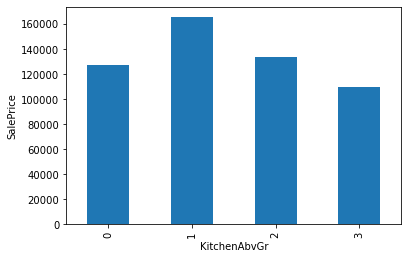

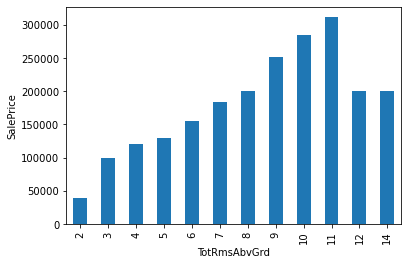

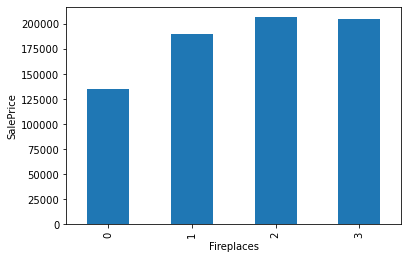

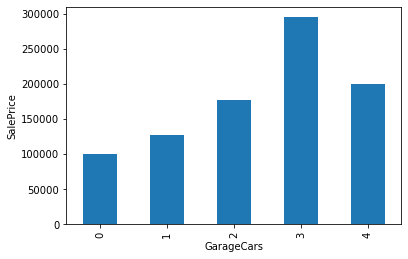

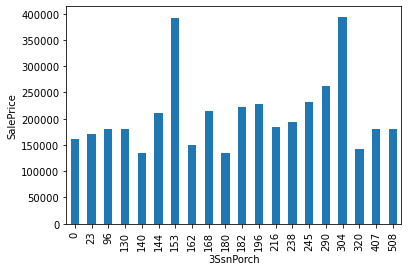

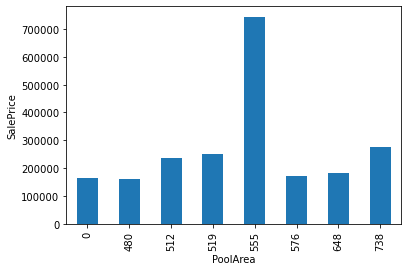

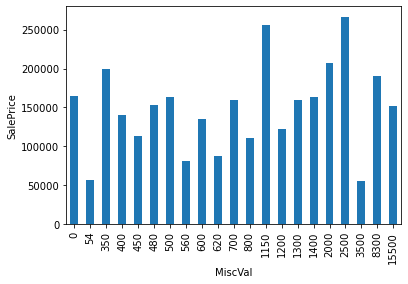

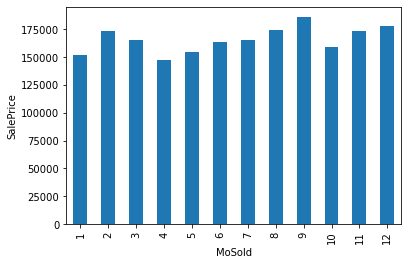

In [27]:
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [28]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features]
continous_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice']

In [29]:
len(continous_features)

21

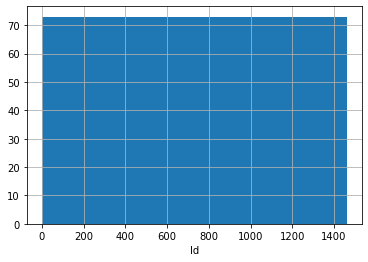

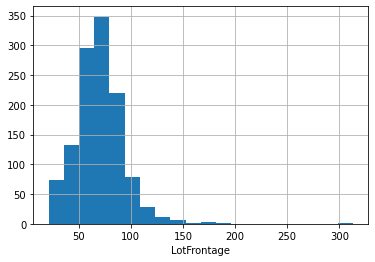

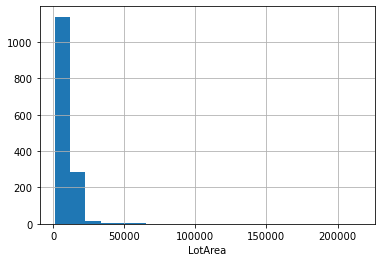

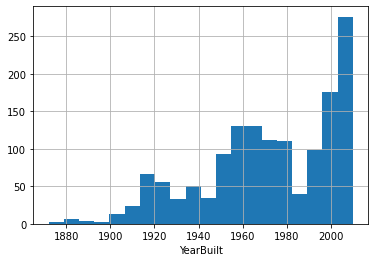

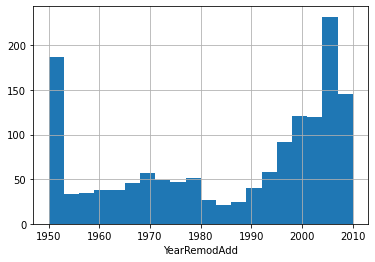

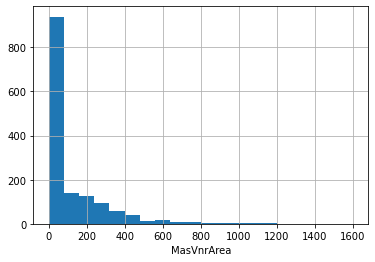

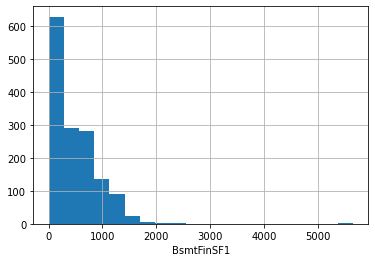

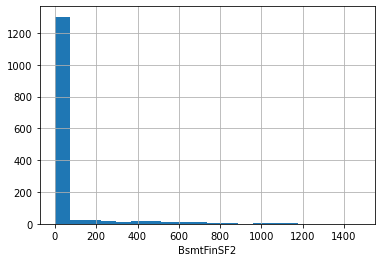

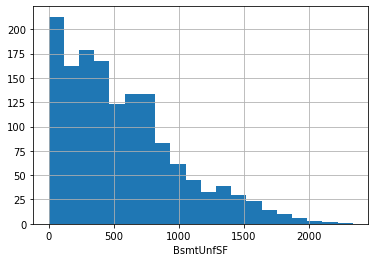

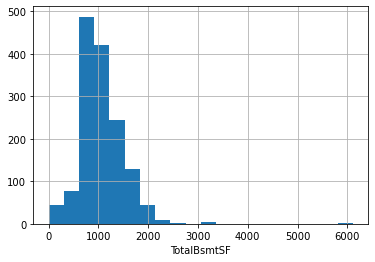

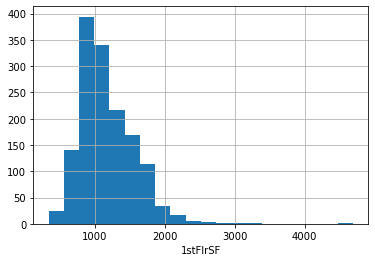

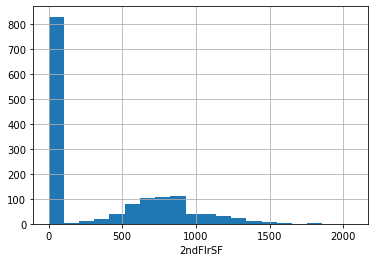

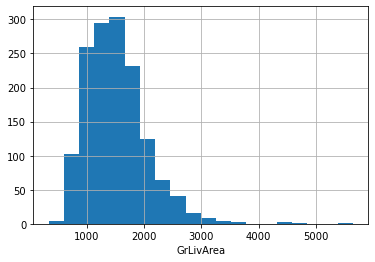

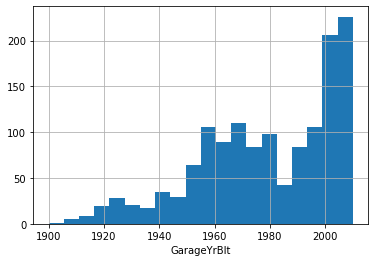

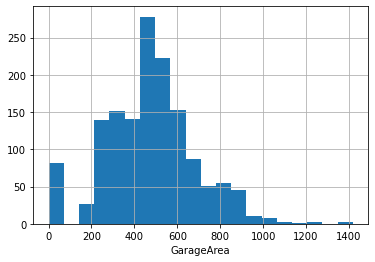

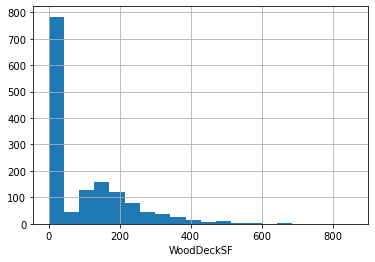

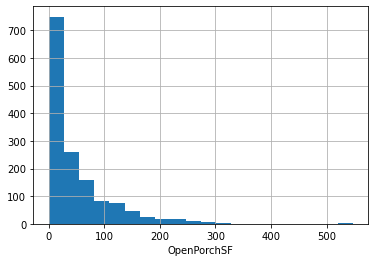

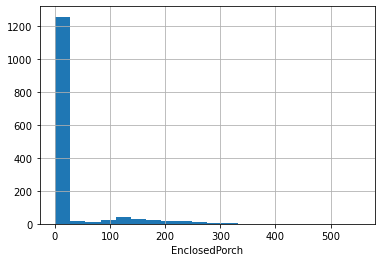

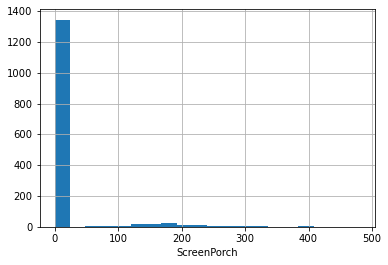

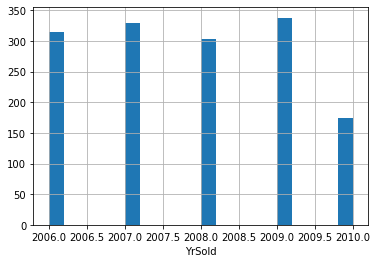

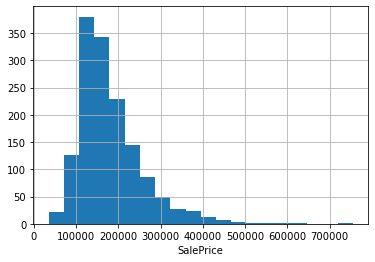

In [30]:
for feature in continous_features:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.show()

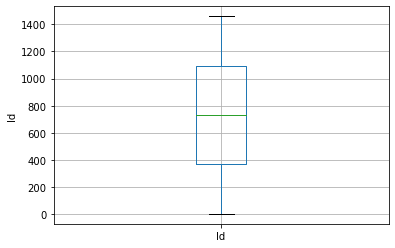

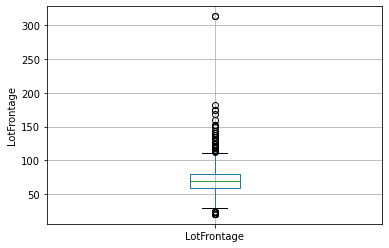

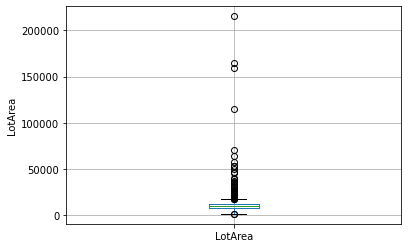

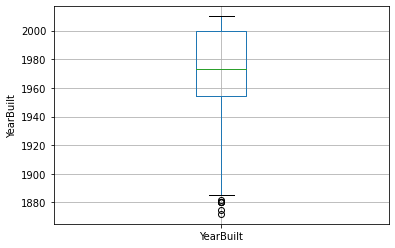

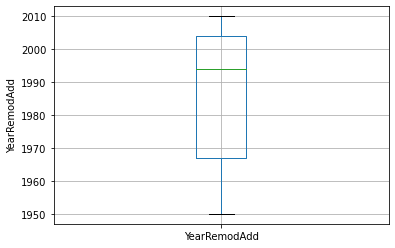

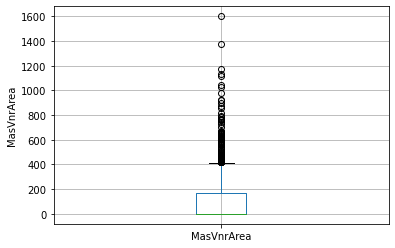

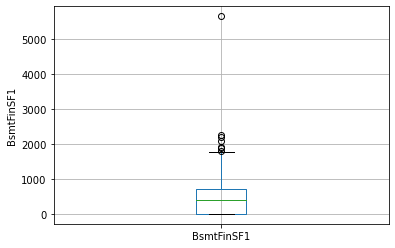

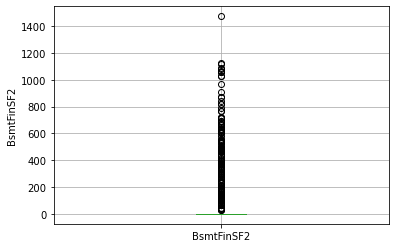

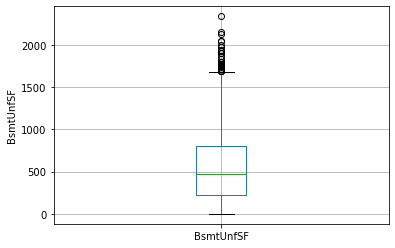

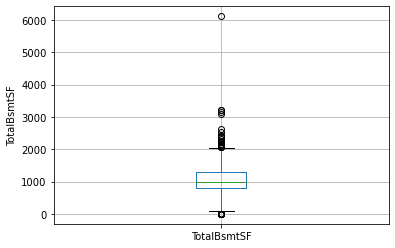

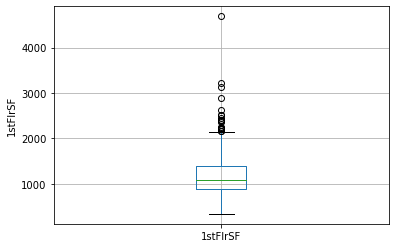

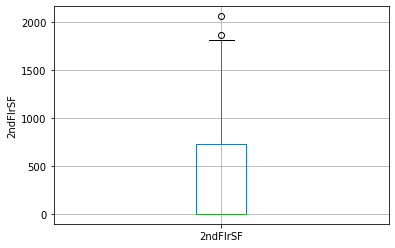

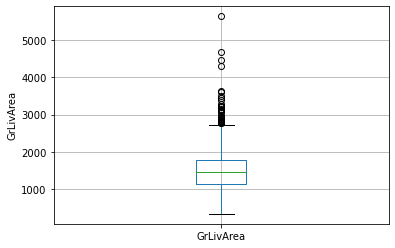

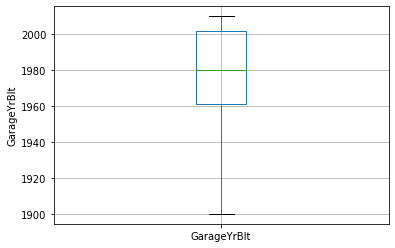

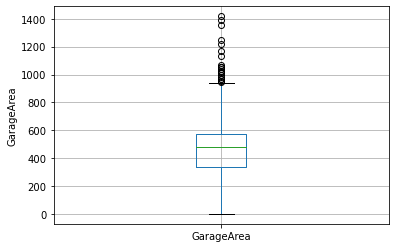

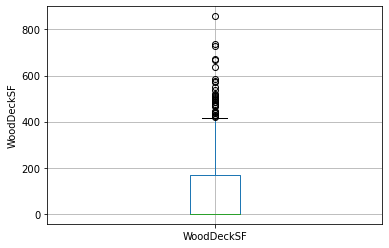

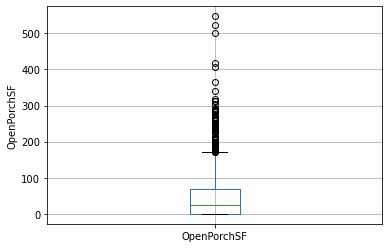

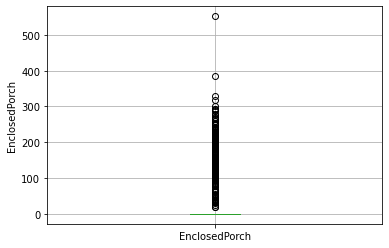

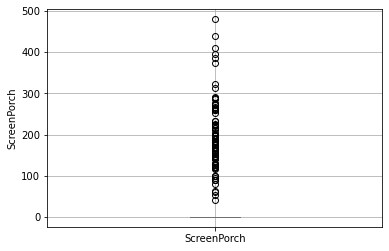

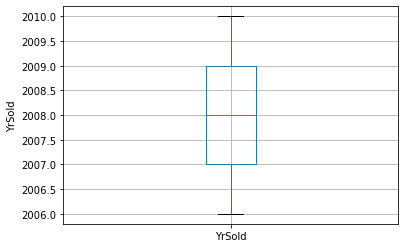

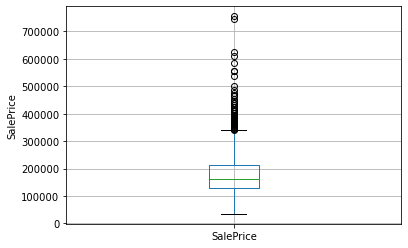

In [31]:
for feature in continous_features:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()
    

In [32]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
dataset[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [34]:
for feature in categorical_features:
    print(feature,dataset[feature].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [35]:
len(categorical_features)

43

In [36]:
for feature in categorical_features:
    print('The feature is {} and number of categories {}'.format(feature,dataset[feature].nunique()))

The feature is MSZoning and number of categories 5
The feature is Street and number of categories 2
The feature is Alley and number of categories 2
The feature is LotShape and number of categories 4
The feature is LandContour and number of categories 4
The feature is Utilities and number of categories 2
The feature is LotConfig and number of categories 5
The feature is LandSlope and number of categories 3
The feature is Neighborhood and number of categories 25
The feature is Condition1 and number of categories 9
The feature is Condition2 and number of categories 8
The feature is BldgType and number of categories 5
The feature is HouseStyle and number of categories 8
The feature is RoofStyle and number of categories 6
The feature is RoofMatl and number of categories 8
The feature is Exterior1st and number of categories 15
The feature is Exterior2nd and number of categories 16
The feature is MasVnrType and number of categories 4
The feature is ExterQual and number of categories 4
The fea

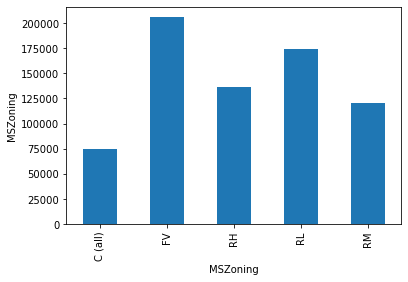

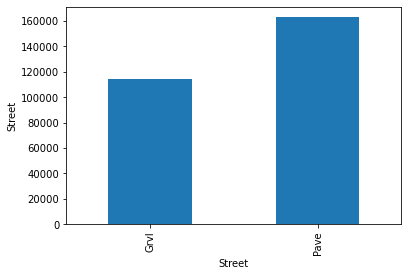

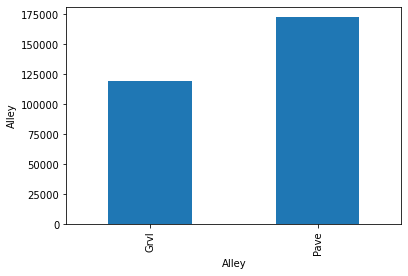

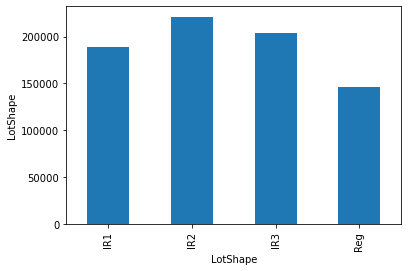

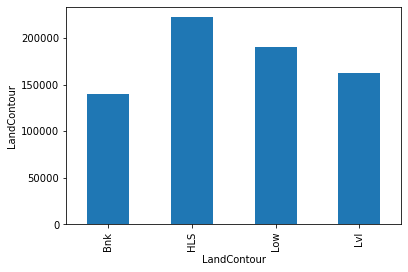

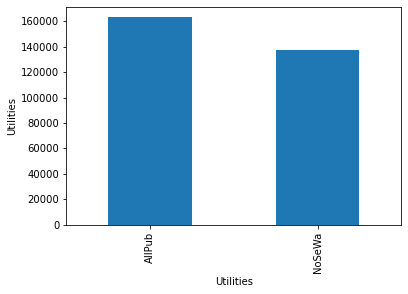

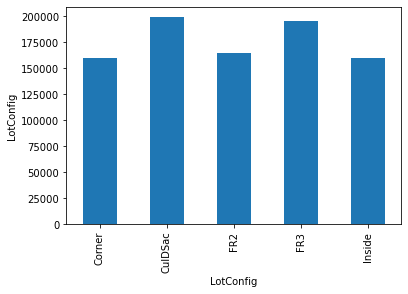

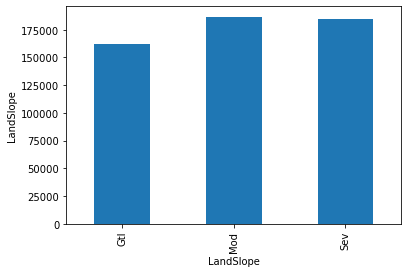

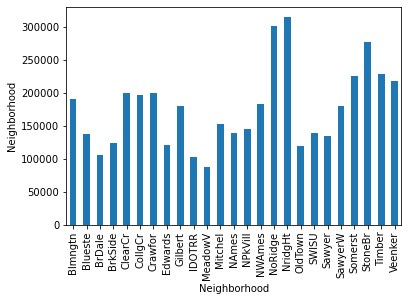

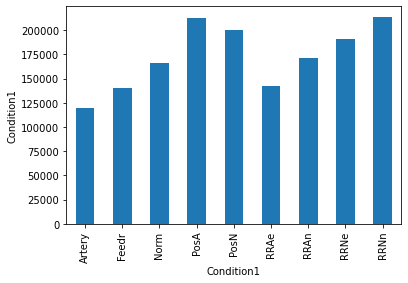

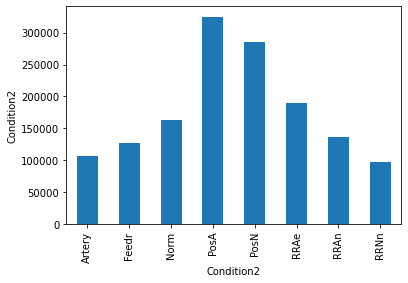

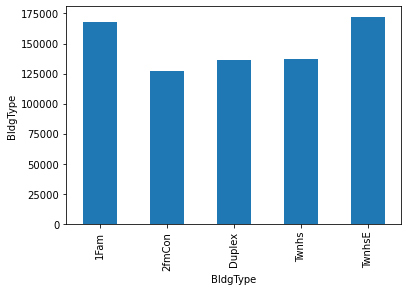

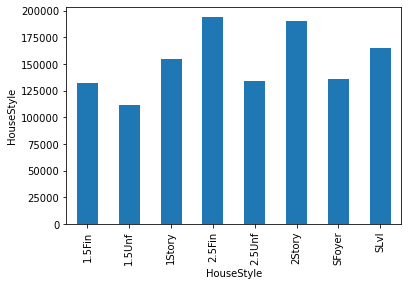

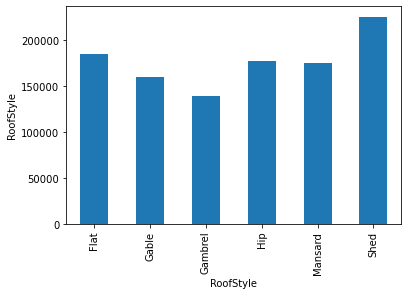

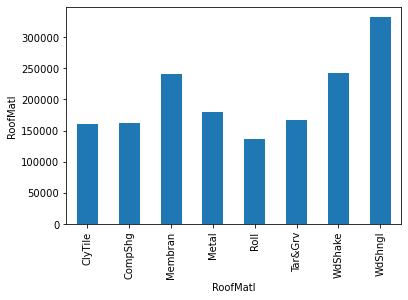

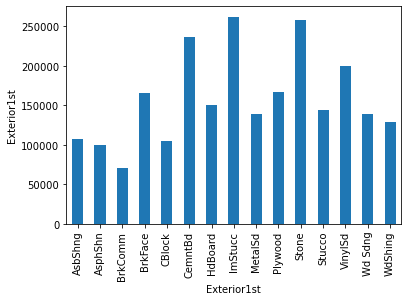

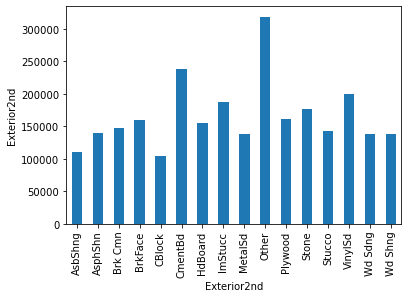

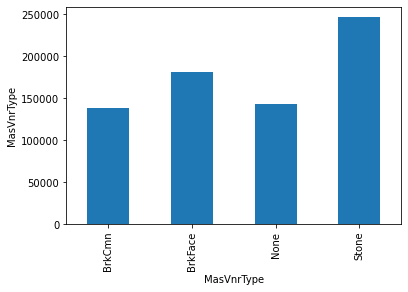

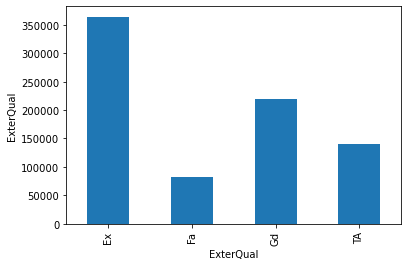

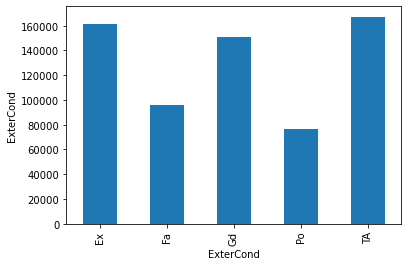

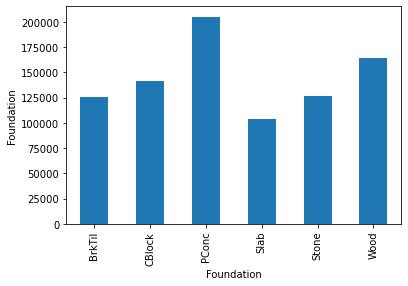

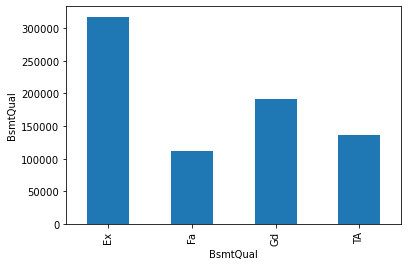

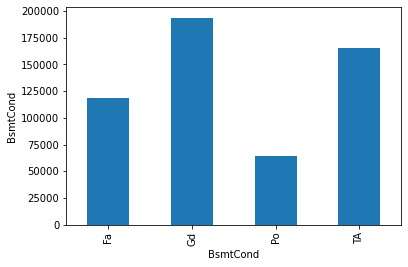

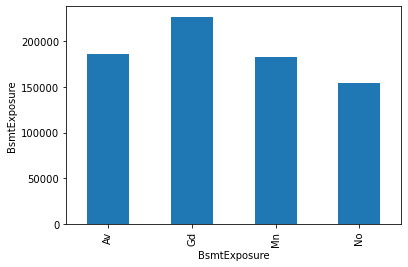

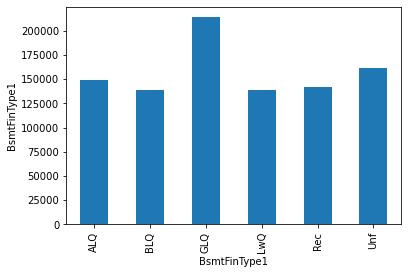

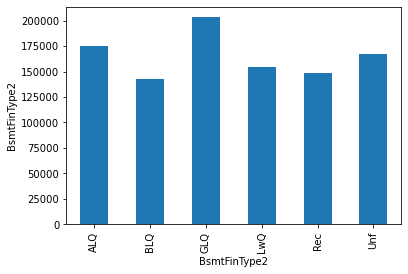

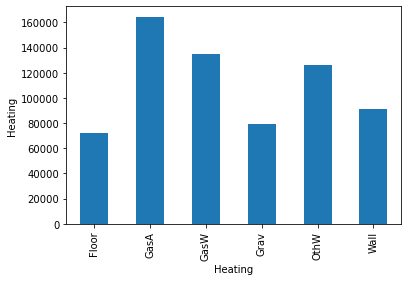

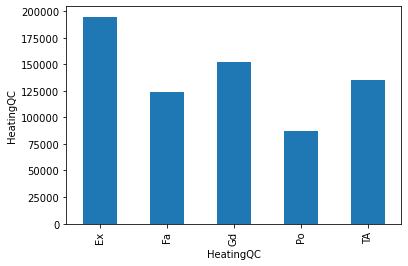

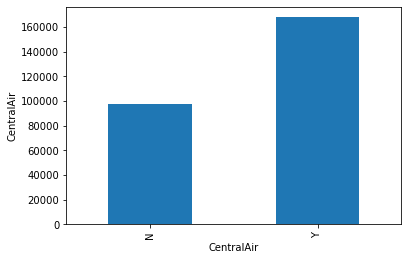

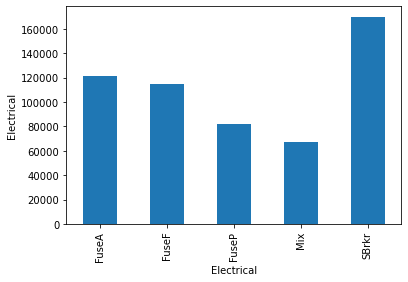

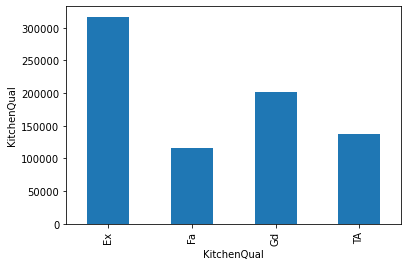

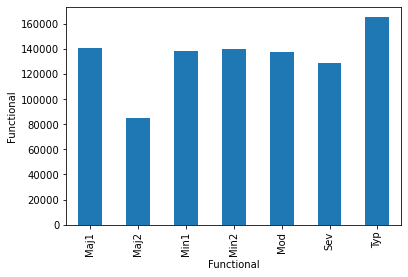

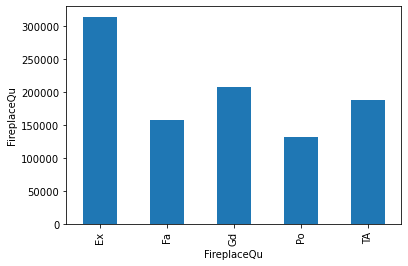

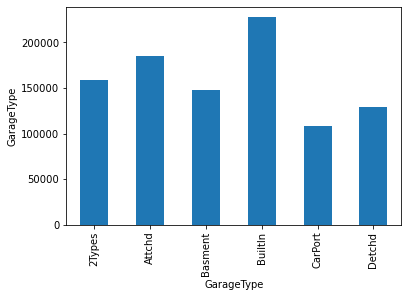

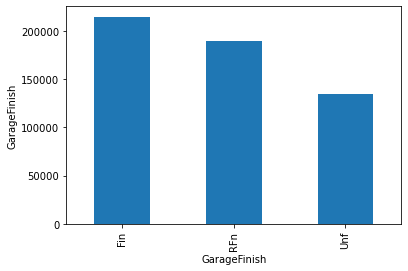

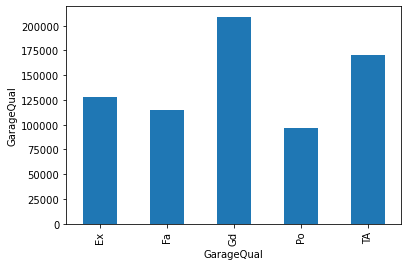

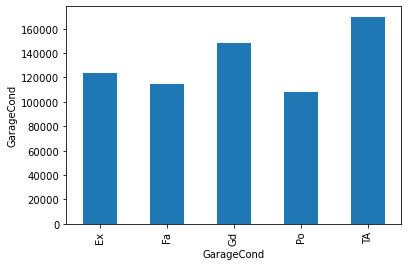

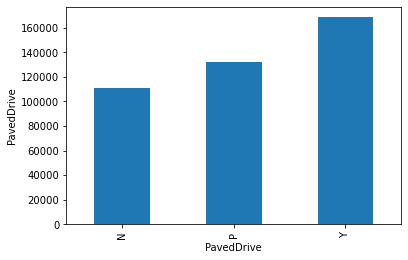

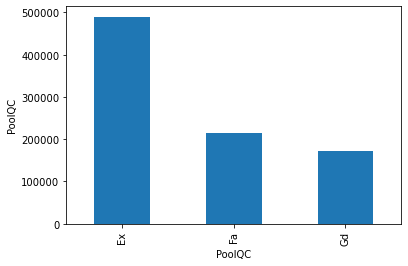

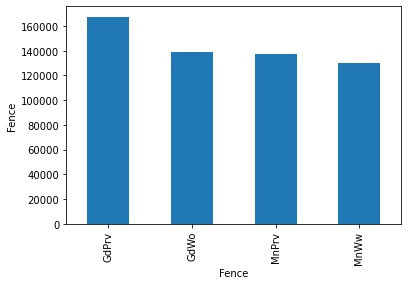

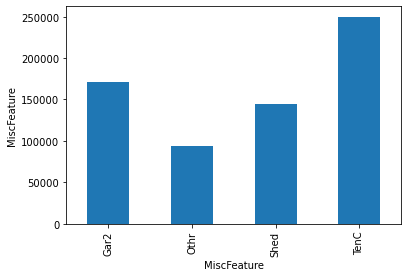

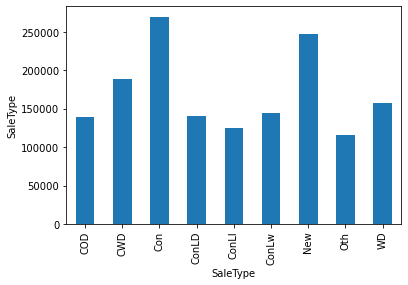

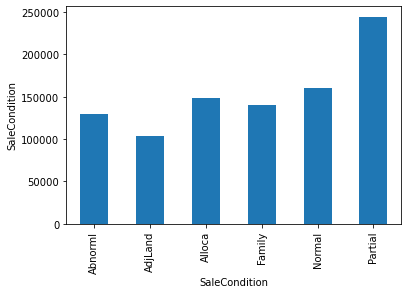

In [37]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel(feature)
    plt.show()

# Feature Engineering

In [38]:
categorical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=="O"]
for feature in categorical_with_nan:
    print("{} : {} %missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley : 0.9377 %missing values
MasVnrType : 0.0055 %missing values
BsmtQual : 0.0253 %missing values
BsmtCond : 0.0253 %missing values
BsmtExposure : 0.026 %missing values
BsmtFinType1 : 0.0253 %missing values
BsmtFinType2 : 0.026 %missing values
Electrical : 0.0007 %missing values
FireplaceQu : 0.4726 %missing values
GarageType : 0.0555 %missing values
GarageFinish : 0.0555 %missing values
GarageQual : 0.0555 %missing values
GarageCond : 0.0555 %missing values
PoolQC : 0.9952 %missing values
Fence : 0.8075 %missing values
MiscFeature : 0.963 %missing values


In [39]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[categorical_with_nan]=data[categorical_with_nan].fillna("Missing")
    return data

dataset=replace_cat_feature(dataset,categorical_with_nan)
dataset[categorical_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [41]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [42]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!="O"]
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [43]:
len(numerical_with_nan)

3

In [44]:
for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    dataset[feature].fillna(median_value,inplace=True)
    


In [45]:
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [46]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [47]:
num_features=["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]

In [48]:
for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [49]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216


In [50]:
for feature in categorical_features:
    labels_ordered=dataset.groupby(feature)["SalePrice"].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [51]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,2003,2003,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,1976,1976,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,2001,2002,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,1915,1970,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,2000,2000,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216


In [52]:
feature_scale=[feature for feature in dataset.columns if feature not in ["Id","SalePrice"]]

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [54]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,2003,2003,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,1976,1976,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,2001,2002,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,1915,1970,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,2000,2000,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216


In [55]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [56]:
data=pd.concat([dataset[["Id","SalePrice"]].reset_index(drop=True),
               pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [57]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.949275,0.883333,0.2,0.285714,0.857143,0.866667,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.936364,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.753623,0.433333,0.2,0.285714,0.428571,0.400000,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.690909,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.934783,0.866667,0.2,0.285714,0.857143,0.866667,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.918182,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.311594,0.333333,0.2,0.285714,0.285714,0.466667,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.890909,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.927536,0.833333,0.2,0.285714,0.857143,0.866667,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.909091,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.5,0.8


In [58]:
import pickle

pickle.dump(scaler,open("scaling.pkl","wb"))

In [59]:
data.corr()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,1.000000,-0.017942,0.011156,0.029329,-0.017214,-0.017482,0.008916,-0.001530,-0.036312,0.003741,-0.013324,-0.015817,0.005847,0.003506,-0.004610,0.050172,0.016869,-0.004287,-0.028365,0.012609,-0.012713,-0.021998,0.043882,-0.049095,0.000731,-0.008517,0.012847,-0.051071,0.005039,0.041433,-0.006660,-0.032631,0.013828,0.017320,-0.007186,-0.005024,-0.002844,-0.005968,-0.007940,-0.015415,-0.047434,-0.015001,0.009821,0.051052,0.009421,0.005590,-0.044230,0.004183,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.013154,-0.019772,0.004736,0.004630,-0.000122,0.013821,0.016570,0.017634,0.023058,0.006133,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,0.033928,0.003766,0.051834,-0.006242,0.021172,0.000712,-0.022861,-0.004700
SalePrice,-0.017942,1.000000,-0.073959,0.410575,0.345755,0.399918,0.057369,0.157281,0.281623,0.154134,0.012632,0.145078,0.038526,0.742641,0.193701,0.108098,0.175402,0.314998,0.817184,-0.036868,0.586570,0.565608,0.205915,0.130646,0.413927,0.402828,0.427868,0.426775,0.678840,0.178841,0.550411,0.647718,0.285214,0.357421,0.396688,0.372023,0.182484,0.004832,0.221985,0.612134,0.179754,0.473762,0.351600,0.309383,0.608947,0.319300,-0.037963,0.730255,0.236224,-0.005149,0.594771,0.313982,0.209044,-0.147548,0.667893,0.534422,0.138038,0.489449,0.547151,0.575628,0.495794,0.604878,0.680625,0.650888,0.358360,0.377612,0.304688,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,0.085126,0.196914,0.093233,-0.020021,0.057329,-0.037263,0.342225,0.270023
MSSubClass,0.011156,-0.073959,1.000000,-0.211535,-0.477364,-0.462668,-0.024969,-0.105995,-0.103700,-0.027856,0.022844,-0.053177,-0.025672,-0.045914,-0.022950,-0.036884,-0.340538,0.187423,0.032628,-0.059316,0.027850,0.040581,-0.137128,-0.034054,0.000177,-0.033074,0.012298,0.023573,0.016178,-0.013197,0.060091,0.060184,-0.012580,0.051150,0.122078,-0.069836,0.031799,-0.065649,-0.140759,-0.238518,-0.025339,-0.019458,-0.101774,0.035557,-0.288607,0.307886,0.046474,0.081717,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,0.016877,-0.045569,-0.039267,-0.109153,0.081396,-0.033077,-0.040110,-0.098672,-0.051952,-0.083361,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,0.005221,0.117495,0.029469,-0.007683,-0.013585,-0.021407,-0.040549,-0.027544
MSZoning,0.029329,0.410575,-0.211535,1.000000,0.315592,0.321035,0.084606,0.221947,0.187166,0.045657,-0.009400,0.095729,0.006208,0.570394,0.123835,0.077112,0.118228,0.186939,0.269302,-0.146350,0.461917,0.241138,0.069497,0.014908,0.194616,0.208429,0.148044,0.125409,0.274595,0.131753,0.273506,0.243081,0.087253,0.086154,0.053950,0.170059,-0.046165,0.035922,0.046960,0.237309,0.075317,0.199776,0.254369,0.191717,0.270233,-0.007883,-0.105732,0.192957,0.120119,0.025223,0.266772,0.168978,0.105903,-0.111713,0.247010,0.121840,0.060177,0.170517,0.169354,0.354366,0.310815,0.285038,0.253433,0.255667,0.178975,0.195544,0.289688,0.125597,0.092446,-0.224789,0.032781,0.024213,0.024663,0.022729,0.040971,0.033621,0.000786,-0.004702,0.010486,0.170788,0.121091
LotFrontage,-0.017214,0.345755,-0.477364,0.315592,1.000000,0.653416,-0.034299,0.145917,0.13

<AxesSubplot:>

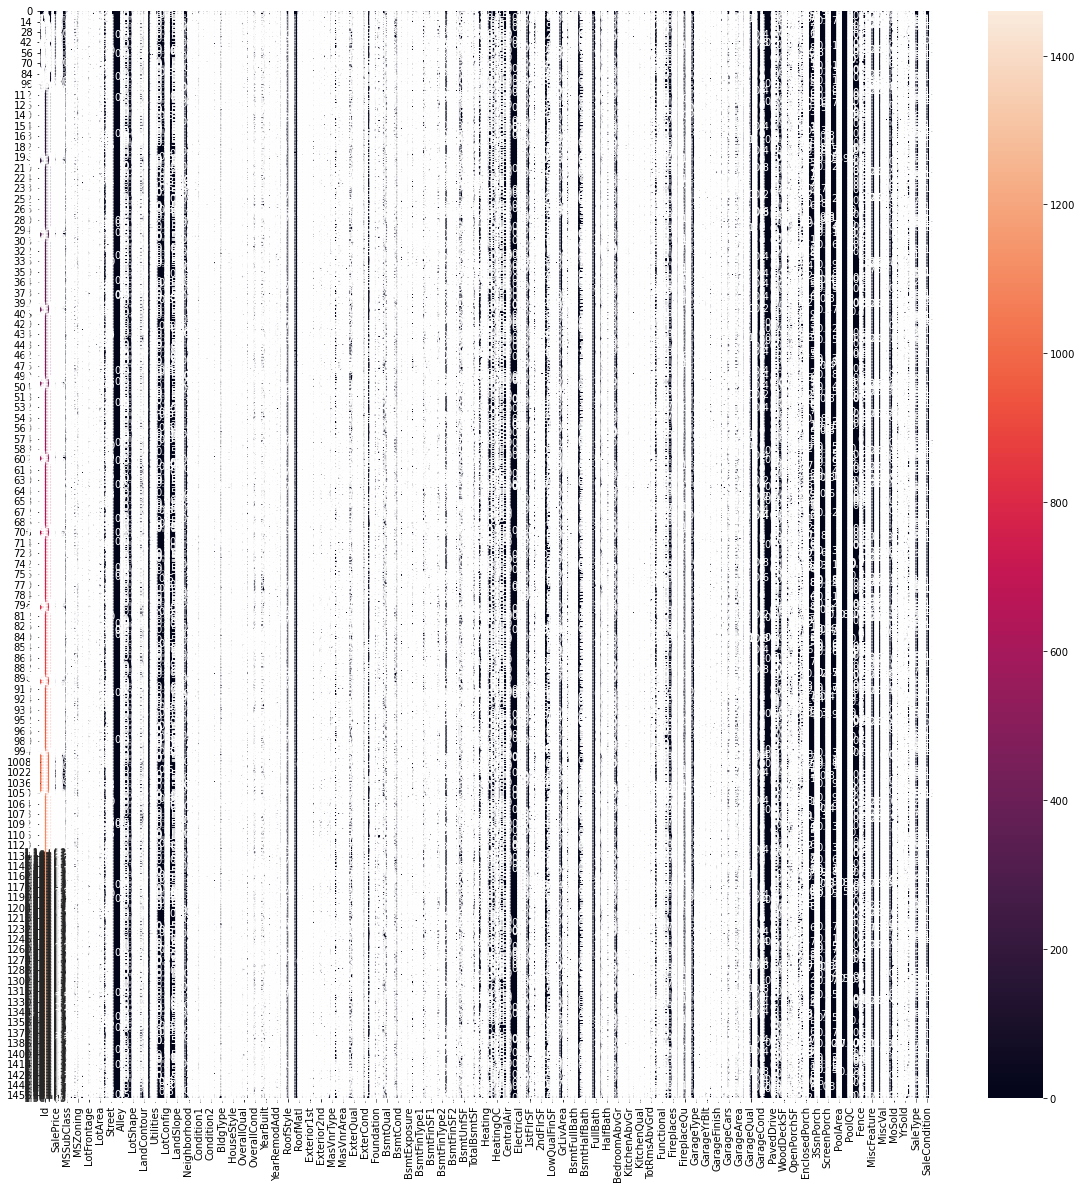

In [60]:
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(data,annot=True)

In [61]:
x=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

In [62]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.949275,0.883333,0.2,0.285714,0.857143,0.866667,0.50,0.122500,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.2,0.833333,0.936364,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.50,0.5,0.8
1,2,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.753623,0.433333,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.833333,0.690909,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.363636,0.25,0.5,0.8
2,3,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.934783,0.866667,0.2,0.285714,0.857143,0.866667,0.50,0.101250,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.833333,0.918182,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.727273,0.50,0.5,0.8
3,4,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.311594,0.333333,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.333333,0.890909,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.00,0.5,0.2
4,5,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.927536,0.833333,0.2,0.285714,0.857143,0.866667,0.50,0.218750,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.833333,0.909091,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,1.000000,0.50,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,0.75,0.400718,0.353592,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.583333,0.375,0.571429,0.75,0.857

In [63]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [65]:
model.feature_importances_

array([2.21122969e-03, 3.58416955e-03, 1.04950808e-02, 3.35912782e-03,
       7.26672968e-03, 1.85700075e-04, 1.27674658e-03, 2.21586042e-03,
       2.04841441e-03, 1.53999413e-05, 1.85784784e-03, 1.33293837e-03,
       1.22291823e-01, 1.81049801e-03, 2.43320984e-04, 9.66578499e-04,
       2.27472342e-03, 1.83644834e-01, 6.20924420e-03, 2.05805452e-02,
       5.43092086e-03, 2.12196665e-03, 5.69575059e-04, 2.50543378e-03,
       2.39591543e-03, 1.57586097e-03, 1.99838050e-03, 1.16001995e-01,
       3.33526436e-03, 2.29859986e-03, 1.51724775e-02, 2.14041864e-03,
       3.48205534e-03, 2.55456825e-03, 1.02144877e-02, 1.06796832e-03,
       9.27027452e-04, 2.72720140e-03, 1.47138540e-02, 5.74061876e-04,
       2.30998755e-03, 2.88993823e-02, 9.73914043e-04, 2.02207773e-02,
       7.88456551e-03, 4.84759759e-04, 8.34019463e-02, 5.27434755e-03,
       7.76719645e-04, 2.88251442e-02, 3.63590027e-03, 8.54975531e-03,
       1.21615935e-03, 7.23335722e-02, 6.32110655e-03, 1.96009681e-03,
      

In [66]:
len(model.feature_importances_)

80

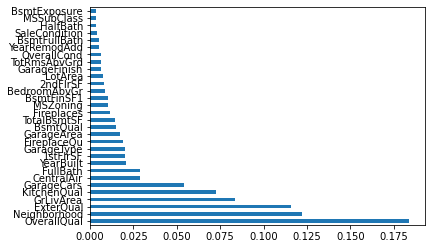

In [67]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [68]:
feat_importances.nlargest(30)

OverallQual      0.183645
Neighborhood     0.122292
ExterQual        0.116002
GrLivArea        0.083402
KitchenQual      0.072334
GarageCars       0.054234
CentralAir       0.028899
FullBath         0.028825
YearBuilt        0.020581
1stFlrSF         0.020221
GarageType       0.020177
FireplaceQu      0.018985
GarageArea       0.017289
BsmtQual         0.015172
TotalBsmtSF      0.014714
Fireplaces       0.011465
MSZoning         0.010495
BsmtFinSF1       0.010214
BedroomAbvGr     0.008550
2ndFlrSF         0.007885
LotArea          0.007267
GarageFinish     0.006598
TotRmsAbvGrd     0.006321
OverallCond      0.006209
YearRemodAdd     0.005431
BsmtFullBath     0.005274
SaleCondition    0.004040
HalfBath         0.003636
MSSubClass       0.003584
BsmtExposure     0.003482
dtype: float64

In [69]:
for i in range(30):
    r=feat_importances.nlargest(30).index[i]
    print(r)

OverallQual
Neighborhood
ExterQual
GrLivArea
KitchenQual
GarageCars
CentralAir
FullBath
YearBuilt
1stFlrSF
GarageType
FireplaceQu
GarageArea
BsmtQual
TotalBsmtSF
Fireplaces
MSZoning
BsmtFinSF1
BedroomAbvGr
2ndFlrSF
LotArea
GarageFinish
TotRmsAbvGrd
OverallCond
YearRemodAdd
BsmtFullBath
SaleCondition
HalfBath
MSSubClass
BsmtExposure


In [70]:
df=data[['Id','OverallQual','ExterQual','Neighborhood','KitchenQual','GrLivArea',
'GarageCars',
'BsmtQual',
'CentralAir',
'FireplaceQu',
'GarageFinish',
'FullBath',
'1stFlrSF',
'GarageArea',
'TotalBsmtSF',
'GarageType',
'YearBuilt',
'Fireplaces',
'BsmtFinSF1',
'2ndFlrSF',
'BedroomAbvGr',
'LotArea',
'TotRmsAbvGrd',
'MSZoning',
'YearRemodAdd',
'OverallCond',
'BsmtFullBath',
'SaleCondition',
'MSSubClass',
'BsmtExposure',
'LotFrontage','SalePrice']]

In [71]:
df.head()

,Id,OverallQual,ExterQual,Neighborhood,KitchenQual,GrLivArea,GarageCars,BsmtQual,CentralAir,FireplaceQu,GarageFinish,FullBath,1stFlrSF,GarageArea,TotalBsmtSF,GarageType,YearBuilt,Fireplaces,BsmtFinSF1,2ndFlrSF,BedroomAbvGr,LotArea,TotRmsAbvGrd,MSZoning,YearRemodAdd,OverallCond,BsmtFullBath,SaleCondition,MSSubClass,BsmtExposure,LotFrontage,SalePrice
0,1,0.666667,0.666667,0.625000,0.666667,0.577712,0.50,0.75,1.0,0.2,0.666667,0.666667,0.356155,0.386460,0.140098,0.833333,0.949275,0.000000,0.125089,0.413559,0.375,0.366344,0.500000,0.75,0.883333,0.500,0.333333,0.8,0.235294,0.25,0.418208,12.247694
1,2,0.555556,0.333333,0.833333,0.333333,0.470245,0.50,0.75,1.0,0.6,0.666667,0.666667,0.503056,0.324401,0.206547,0.833333,0.753623,0.333333,0.173281,0.000000,0.375,0.391317,0.333333,0.75,0.433333,0.875,0.000000,0.8,0.000000,1.00,0.495064,12.109011
2,3,0.666667,0.666667,0.625000,0.666667,0.593095,0.50,0.75,1.0,0.6,0.666667,0.666667,0.383441,0.428773,0.150573,0.833333,0.934783,0.333333,0.086109,0.419370,0.375,0.422359,0.333333,0.75,0.866667,0.500,0.333333,0.8,0.235294,0.50,0.434909,12.317167
3,4,0.666667,0.333333,0.708333,0.666667,0.579157,0.75,0.50,1.0,0.8,0.333333,0.333333,0.399941,0.452750,0.123732,0.333333,0.311594,0.333333,0.038271,0.366102,0.375,0.390295,0.416667,0.75,0.333333,0.500,0.333333,0.2,0.294118,0.25,0.388581,11.849398
4,5,0.777778,0.666667,1.000000,0.666667,0.666523,0.75,0.75,1.0,0.6,0.666667,0.666667,0.466237,0.589563,0.187398,0.833333,0.927536,0.333333,0.116052,0.509927,0.500,0.468761,0.583333,0.75,0.833333,0.500,0.333333,0.8,0.235294,0.75,0.513123,12.429216


In [72]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
x.head()

,Id,OverallQual,ExterQual,Neighborhood,KitchenQual,GrLivArea,GarageCars,BsmtQual,CentralAir,FireplaceQu,GarageFinish,FullBath,1stFlrSF,GarageArea,TotalBsmtSF,GarageType,YearBuilt,Fireplaces,BsmtFinSF1,2ndFlrSF,BedroomAbvGr,LotArea,TotRmsAbvGrd,MSZoning,YearRemodAdd,OverallCond,BsmtFullBath,SaleCondition,MSSubClass,BsmtExposure,LotFrontage
0,1,0.666667,0.666667,0.625000,0.666667,0.577712,0.50,0.75,1.0,0.2,0.666667,0.666667,0.356155,0.386460,0.140098,0.833333,0.949275,0.000000,0.125089,0.413559,0.375,0.366344,0.500000,0.75,0.883333,0.500,0.333333,0.8,0.235294,0.25,0.418208
1,2,0.555556,0.333333,0.833333,0.333333,0.470245,0.50,0.75,1.0,0.6,0.666667,0.666667,0.503056,0.324401,0.206547,0.833333,0.753623,0.333333,0.173281,0.000000,0.375,0.391317,0.333333,0.75,0.433333,0.875,0.000000,0.8,0.000000,1.00,0.495064
2,3,0.666667,0.666667,0.625000,0.666667,0.593095,0.50,0.75,1.0,0.6,0.666667,0.666667,0.383441,0.428773,0.150573,0.833333,0.934783,0.333333,0.086109,0.419370,0.375,0.422359,0.333333,0.75,0.866667,0.500,0.333333,0.8,0.235294,0.50,0.434909
3,4,0.666667,0.333333,0.708333,0.666667,0.579157,0.75,0.50,1.0,0.8,0.333333,0.333333,0.399941,0.452750,0.123732,0.333333,0.311594,0.333333,0.038271,0.366102,0.375,0.390295,0.416667,0.75,0.333333,0.500,0.333333,0.2,0.294118,0.25,0.388581
4,5,0.777778,0.666667,1.000000,0.666667,0.666523,0.75,0.75,1.0,0.6,0.666667,0.666667,0.466237,0.589563,0.187398,0.833333,0.927536,0.333333,0.116052,0.509927,0.500,0.468761,0.583333,0.75,0.833333,0.500,0.333333,0.8,0.235294,0.75,0.513123


In [74]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [76]:
x_train

,Id,OverallQual,ExterQual,Neighborhood,KitchenQual,GrLivArea,GarageCars,BsmtQual,CentralAir,FireplaceQu,GarageFinish,FullBath,1stFlrSF,GarageArea,TotalBsmtSF,GarageType,YearBuilt,Fireplaces,BsmtFinSF1,2ndFlrSF,BedroomAbvGr,LotArea,TotRmsAbvGrd,MSZoning,YearRemodAdd,OverallCond,BsmtFullBath,SaleCondition,MSSubClass,BsmtExposure,LotFrontage
64,65,0.666667,0.333333,0.625000,0.666667,0.639092,0.50,0.75,1.0,0.2,0.666667,0.666667,0.435974,0.454866,0.172995,0.833333,0.905797,0.000000,0.130936,0.473123,0.375,0.386675,0.500000,0.75,0.800000,0.50,0.333333,0.8,0.235294,0.25,0.440313
682,683,0.555556,0.333333,0.750000,0.666667,0.478281,0.50,0.75,1.0,0.8,0.333333,0.333333,0.511654,0.303949,0.211293,0.833333,0.898551,0.333333,0.177711,0.000000,0.250,0.156154,0.333333,0.75,0.783333,0.50,0.333333,0.8,0.588235,0.50,0.440313
960,961,0.444444,0.333333,0.125000,0.333333,0.333750,0.00,0.50,1.0,0.2,0.000000,0.333333,0.357038,0.000000,0.140426,0.000000,0.623188,0.000000,0.123317,0.000000,0.250,0.335203,0.166667,0.75,0.966667,0.75,0.333333,0.8,0.000000,1.00,0.321097
1384,1385,0.555556,0.333333,0.208333,0.333333,0.469121,0.25,0.50,1.0,0.2,0.333333,0.333333,0.278935,0.197461,0.091653,0.333333,0.485507,0.000000,0.036145,0.271186,0.250,0.379986,0.333333,0.75,0.000000,0.50,0.000000,0.8,0.176471,0.50,0.388581
1100,1101,0.111111,0.333333,0.333333,0.000000,0.095894,0.25,0.50,0.0,0.2,0.333333,0.333333,0.102585,0.173484,0.047463,0.333333,0.347826,0.000000,0.051382,0.000000,0.125,0.365182,0.083333,0.75,0.000000,0.50,0.000000,0.8,0.058824,0.25,0.388581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,0.777778,0.666667,1.000000,0.666667,0.692428,0.75,0.75,1.0,0.8,0.666667,0.666667,0.504851,0.603667,0.204910,0.833333,0.920290,0.333333,0.206060,0.531235,0.375,0.387820,0.500000,0.75,0.816667,0.50,0.333333,0.8,0.235294,0.50,0.504203
835,836,0.333333,0.333333,0.250000,0.666667,0.410869,0.50,0.75,1.0,0.2,0.333333,0.666667,0.439537,0.307475,0.174632,0.833333,0.565217,0.000000,0.078313,0.000000,0.250,0.391317,0.166667,0.75,0.750000,0.75,0.000000,0.8,0.000000,0.25,0.388581
1216,1217,0.555556,0.333333,0.250000,0.333333,0.615356,0.50,0.00,1.0,0.2,0.333333,0.666667,0.519487,0.380113,0.000000,0.833333,0.768116,0.000000,0.000000,0.282809,0.500,0.377157,0.500000,0.25,0.466667,0.50,0.000000,0.8,0.411765,0.00,0.434909
559,560,0.666667,0.666667,0.666667,0.666667,0.544554,0.50,0.75,1.0,0.6,1.000000,0.666667,0.582551,0.296192,0.224877,0.833333,0.949275,0.333333,0.000000,0.000000,0.250,0.176055,0.416667,0.75,0.900000,0.50,0.000000,0.8,0.588235,1.00,0.440313


In [77]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
model1=reg.fit(x_train,y_train)

In [78]:
y_pred=model1.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8989892282079306

In [80]:
from xgboost import XGBRegressor
xg=XGBRegressor()
model2=xg.fit(x_train,y_train)

In [81]:
y_pred2=model2.predict(x_test)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.880510620007543

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
raju143=rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_feat

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
raju143.best_params_

In [ ]:
raju143.best_score_

In [ ]:
predictions=raju143.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

In [ ]:
raju143.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators= 600,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 20)
model3=reg.fit(x_train,y_train)

In [ ]:
y_pred3=model3.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

In [ ]:
import pickle    

pickle.dump(reg,open('reg.pkl','wb'))